<a href="https://colab.research.google.com/github/10points/gauge-reader/blob/main/Gauge_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import itertools

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Extract train data
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/gauge_work/train_80.zip")
zip_ref.extractall()
zip_ref.close()

In [4]:
# Extract test data
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/gauge_work/test_20.zip")
zip_ref.extractall()
zip_ref.close()

In [5]:
# Check number of files in train set
for dirpath, dirnames, filenames, in os.walk("/content/content/train"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

there are 22 directories and 0 images in /content/content/train
there are 0 directories and 11 images in /content/content/train/BP_control
there are 0 directories and 22 images in /content/content/train/BW_meter_1
there are 0 directories and 9 images in /content/content/train/BP_boiler_5
there are 0 directories and 8 images in /content/content/train/BP_boiler_2
there are 0 directories and 8 images in /content/content/train/BT_meter
there are 0 directories and 4 images in /content/content/train/CP_compressor_2
there are 0 directories and 4 images in /content/content/train/CP_boiler_1
there are 0 directories and 9 images in /content/content/train/BP_boiler_3
there are 0 directories and 1 images in /content/content/train/CP_compressor_1
there are 0 directories and 12 images in /content/content/train/BP_boiler_1
there are 0 directories and 16 images in /content/content/train/BE_meter
there are 0 directories and 6 images in /content/content/train/BP_compressor_4
there are 0 directories and 

In [6]:
# Check number of files in test set
for dirpath, dirnames, filenames, in os.walk("/content/content/test"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

there are 22 directories and 0 images in /content/content/test
there are 0 directories and 3 images in /content/content/test/BP_control
there are 0 directories and 6 images in /content/content/test/BW_meter_1
there are 0 directories and 3 images in /content/content/test/BP_boiler_5
there are 0 directories and 3 images in /content/content/test/BP_boiler_2
there are 0 directories and 3 images in /content/content/test/BT_meter
there are 0 directories and 2 images in /content/content/test/CP_compressor_2
there are 0 directories and 2 images in /content/content/test/CP_boiler_1
there are 0 directories and 3 images in /content/content/test/BP_boiler_3
there are 0 directories and 1 images in /content/content/test/CP_compressor_1
there are 0 directories and 3 images in /content/content/test/BP_boiler_1
there are 0 directories and 4 images in /content/content/test/BE_meter
there are 0 directories and 2 images in /content/content/test/BP_compressor_4
there are 0 directories and 2 images in /cont

In [7]:
# Get class name
data_dir = pathlib.Path("/content/content/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['BE_control' 'BE_meter' 'BF_meter' 'BP_boiler_1' 'BP_boiler_2'
 'BP_boiler_3' 'BP_boiler_4' 'BP_boiler_5' 'BP_compressor_1'
 'BP_compressor_2' 'BP_compressor_3' 'BP_compressor_4' 'BP_compressor_5'
 'BP_control' 'BT_meter' 'BW_meter_1' 'B_hour_meter' 'CP_boiler_1'
 'CP_boiler_2' 'CP_boiler_3' 'CP_compressor_1' 'CP_compressor_2']


In [8]:
# Show random image function
def show_random_image(target_dir, target_class):
  target_folder = f"{target_dir}/{target_class}"

  random_img = random.sample(os.listdir(target_folder), 1)
  print(random_img)

  # plotting
  img = mpimg.imread(target_folder + "/" + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

['IMG_4408.jpg']
Image shape: (3024, 4032, 3)
['IMG_4313.jpg']
Image shape: (4032, 3024, 3)
['IMG_4150.jpg']
Image shape: (3024, 4032, 3)
['IMG_4157.jpg']
Image shape: (4032, 3024, 3)
['IMG_4176.jpg']
Image shape: (4032, 3024, 3)
['IMG_4183.jpg']
Image shape: (4032, 3024, 3)
['IMG_4208.jpg']
Image shape: (4032, 3024, 3)
['IMG_4214.jpg']
Image shape: (3024, 4032, 3)
['IMG_4252.jpg']
Image shape: (4032, 3024, 3)
['IMG_4283.jpg']
Image shape: (3024, 4032, 3)
['IMG_4295.jpg']
Image shape: (4032, 3024, 3)
['IMG_4302.jpg']
Image shape: (4032, 3024, 3)
['IMG_4430.jpg']
Image shape: (4032, 3024, 3)
['IMG_4243.jpg']
Image shape: (4032, 3024, 3)
['IMG_4225.jpg']
Image shape: (4032, 3024, 3)
['IMG_4121.jpg']
Image shape: (4032, 3024, 3)
['IMG_4367.jpg']
Image shape: (3024, 4032, 3)
['PXL_20220601_030411508.jpg']
Image shape: (4032, 3024, 3)
['PXL_20220601_030357061.jpg']
Image shape: (3024, 4032, 3)
['PXL_20220601_030702077.jpg']
Image shape: (3024, 4032, 3)
['PXL_20220601_031017671.jpg']
Image s

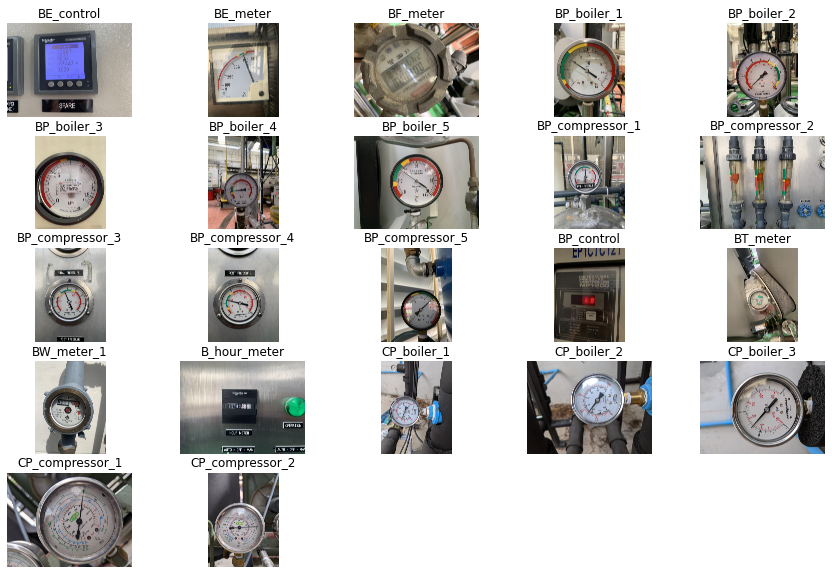

In [9]:
figsize=(15,10)
plt.figure(figsize=figsize)
for index, name in enumerate(class_names):
  # print(index, name)
  plt.subplot(5,5,index+1)
  show_random_image(target_dir="/content/content/train",
                    target_class=name)

## Preprocessing

In [10]:
# Create data generator and re scale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "/content/content/train"
test_dir = "/content/content/test"

# Load image data from directories into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="categorical",
                                             batch_size=32)

Found 235 images belonging to 22 classes.
Found 71 images belonging to 22 classes.


In [11]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [12]:
images_test, labels_test = test_data.next()
len(images_test), len(labels_test)

(32, 32)

In [13]:
# numbers of batches
len(train_data)

8

In [14]:
images[:2], images[0].shape

(array([[[[0.87843144, 0.90196085, 0.9960785 ],
          [0.81568635, 0.8745099 , 0.96470594],
          [0.75294125, 0.7803922 , 0.882353  ],
          ...,
          [0.45882356, 0.5019608 , 0.47058827],
          [0.27058825, 0.26666668, 0.24705884],
          [0.15294118, 0.16078432, 0.15686275]],
 
         [[0.8941177 , 0.91372555, 0.9921569 ],
          [0.86666673, 0.89019614, 0.9921569 ],
          [0.7686275 , 0.7843138 , 0.8980393 ],
          ...,
          [0.227451  , 0.19607845, 0.18823531],
          [0.1137255 , 0.12156864, 0.11764707],
          [0.12156864, 0.12941177, 0.11764707]],
 
         [[0.8705883 , 0.8941177 , 0.9803922 ],
          [0.8705883 , 0.8941177 , 0.98823535],
          [0.7686275 , 0.7960785 , 0.9058824 ],
          ...,
          [0.15294118, 0.14509805, 0.14901961],
          [0.12156864, 0.12156864, 0.1137255 ],
          [0.24313727, 0.2392157 , 0.22352943]],
 
         ...,
 
         [[0.48627454, 0.47058827, 0.4666667 ],
          [0.50196

In [15]:
labels

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [16]:
len(test_data)

3

##Modeling

### 1.Baseline

In [17]:
# Create the baseline model
model_1 = Sequential([
  Conv2D(10, (3,3), input_shape=(224, 224,3)),
  Activation("relu"),
  MaxPool2D(pool_size=(2,2)),
  Flatten(),
  Dense(len(class_names)),
  Activation("softmax")
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [18]:
# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
8/8 [==============================] - 54s 5s/step - loss: 33.3361 - accuracy: 0.1021 - val_loss: 34.8155 - val_accuracy: 0.1408
Epoch 2/20
8/8 [==============================] - 44s 6s/step - loss: 29.1612 - accuracy: 0.2170 - val_loss: 19.9321 - val_accuracy: 0.2113
Epoch 3/20
8/8 [==============================] - 43s 5s/step - loss: 8.1934 - accuracy: 0.3957 - val_loss: 6.0479 - val_accuracy: 0.5070
Epoch 4/20
8/8 [==============================] - 43s 5s/step - loss: 3.1845 - accuracy: 0.6851 - val_loss: 3.7562 - val_accuracy: 0.6620
Epoch 5/20
8/8 [==============================] - 43s 5s/step - loss: 0.9814 - accuracy: 0.8298 - val_loss: 1.4967 - val_accuracy: 0.7042
Epoch 6/20
8/8 [==============================] - 42s 5s/step - loss: 0.0933 - accuracy: 0.9787 - val_loss: 0.8397 - val_accuracy: 0.8310
Epoch 7/20
8/8 [==============================] - 43s 6s/step - loss: 0.0891 - accuracy: 0.9915 - val_loss: 0.6121 - val_accuracy: 0.7887
Epoch 8/20
8/8 [==============

In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 123210)            0         
                                                                 
 dense (Dense)               (None, 22)                2710642   
                                                                 
 activation_1 (Activation)   (None, 22)                0         
                                                        

In [20]:
# Plot the validation and training curve separately
def plot_loss_curve(history):
  """
  Returns separate loss curve for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) 

  # Plot loss 
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

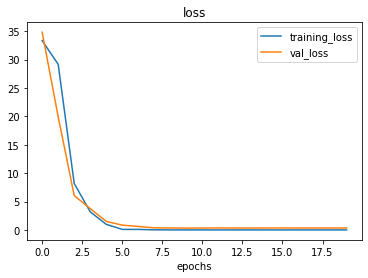

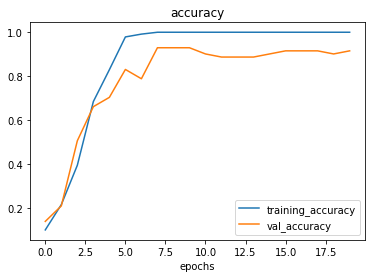

In [21]:
plot_loss_curve(history_1)

### 2.Model_2

In [22]:
# Create the model
model_2 = Sequential([
  Conv2D(10, (3, 3), input_shape=(224, 224, 3)),
  Activation("relu"),
  MaxPool2D(pool_size=(2, 2)),
  Conv2D(10, (3, 3)),
  Activation("relu"),
  MaxPool2D(pool_size=(2, 2)),
  Conv2D(10, (3, 3)),
  Activation("relu"),
  MaxPool2D(),
  Flatten(),
  Dense(len(class_names)),
  Activation("softmax")
])

In [23]:
# Compile model_2
model_2.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [24]:
# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
8/8 [==============================] - 47s 6s/step - loss: 3.0414 - accuracy: 0.1277 - val_loss: 2.9225 - val_accuracy: 0.1268
Epoch 2/20
8/8 [==============================] - 42s 5s/step - loss: 2.7413 - accuracy: 0.1872 - val_loss: 2.7529 - val_accuracy: 0.2254
Epoch 3/20
8/8 [==============================] - 42s 5s/step - loss: 2.3469 - accuracy: 0.4213 - val_loss: 2.2966 - val_accuracy: 0.5634
Epoch 4/20
8/8 [==============================] - 42s 5s/step - loss: 1.5590 - accuracy: 0.8000 - val_loss: 1.3818 - val_accuracy: 0.7465
Epoch 5/20
8/8 [==============================] - 43s 6s/step - loss: 0.6198 - accuracy: 0.9532 - val_loss: 0.7403 - val_accuracy: 0.8732
Epoch 6/20
8/8 [==============================] - 42s 5s/step - loss: 0.2749 - accuracy: 0.9447 - val_loss: 0.4899 - val_accuracy: 0.8873
Epoch 7/20
8/8 [==============================] - 42s 5s/step - loss: 0.1269 - accuracy: 0.9702 - val_loss: 0.3931 - val_accuracy: 0.8451
Epoch 8/20
8/8 [==================

In [25]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 activation_2 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 activation_3 (Activation)   (None, 109, 109, 10)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                  

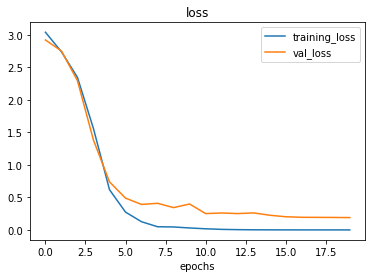

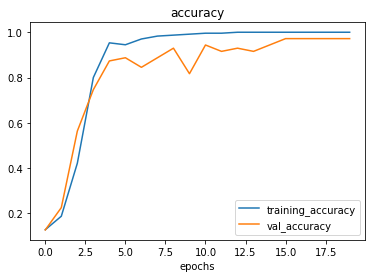

In [26]:
plot_loss_curve(history_2)

###Data Augmentation

In [27]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, 
                                             shear_range=0.2, 
                                             zoom_range=0.2, 
                                             width_shift_range=0.2, 
                                             height_shift_range=0.2, 
                                             horizontal_flip=True) 

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [28]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                                                   shuffle=True) 

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Augmented training images:
Found 235 images belonging to 22 classes.
Unchanged test images:
Found 71 images belonging to 22 classes.


### Model_3
Same as baseline model
except train data which is an augmentation data

In [29]:
# Create model_3
model_3 = tf.keras.models.clone_model(model_1)

# Compile model_3
model_3.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [30]:
# Fit the model
history_3 = model_3.fit(train_data_augmented,
                        epochs=20,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
8/8 [==============================] - 50s 6s/step - loss: 29.7146 - accuracy: 0.0468 - val_loss: 42.7750 - val_accuracy: 0.0282
Epoch 2/20
8/8 [==============================] - 44s 6s/step - loss: 35.8161 - accuracy: 0.0383 - val_loss: 24.4334 - val_accuracy: 0.0423
Epoch 3/20
8/8 [==============================] - 44s 6s/step - loss: 18.0475 - accuracy: 0.0979 - val_loss: 10.3769 - val_accuracy: 0.1549
Epoch 4/20
8/8 [==============================] - 44s 6s/step - loss: 6.0301 - accuracy: 0.1319 - val_loss: 3.9380 - val_accuracy: 0.2113
Epoch 5/20
8/8 [==============================] - 45s 6s/step - loss: 3.1382 - accuracy: 0.2426 - val_loss: 2.5694 - val_accuracy: 0.3521
Epoch 6/20
8/8 [==============================] - 44s 6s/step - loss: 2.5934 - accuracy: 0.3106 - val_loss: 2.2066 - val_accuracy: 0.3380
Epoch 7/20
8/8 [==============================] - 44s 6s/step - loss: 2.2905 - accuracy: 0.3660 - val_loss: 1.9673 - val_accuracy: 0.5070
Epoch 8/20
8/8 [============

### Model_4
same as model 3
additional, 50 epochs

In [31]:
# Create model_4
model_4 = tf.keras.models.clone_model(model_1)

# Compile model_4
model_4.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [32]:
# Fit model
history_4 = model_4.fit(train_data_augmented,
                        epochs=50,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/50
8/8 [==============================] - 51s 6s/step - loss: 7.8404 - accuracy: 0.1064 - val_loss: 4.7646 - val_accuracy: 0.0704
Epoch 2/50
8/8 [==============================] - 44s 6s/step - loss: 3.7494 - accuracy: 0.0553 - val_loss: 2.8302 - val_accuracy: 0.2113
Epoch 3/50
8/8 [==============================] - 44s 6s/step - loss: 2.5608 - accuracy: 0.2723 - val_loss: 2.4833 - val_accuracy: 0.3099
Epoch 4/50
8/8 [==============================] - 44s 6s/step - loss: 2.2672 - accuracy: 0.3574 - val_loss: 1.9320 - val_accuracy: 0.5070
Epoch 5/50
8/8 [==============================] - 44s 6s/step - loss: 1.8916 - accuracy: 0.4681 - val_loss: 1.4295 - val_accuracy: 0.6479
Epoch 6/50
8/8 [==============================] - 44s 6s/step - loss: 1.5684 - accuracy: 0.5404 - val_loss: 0.9901 - val_accuracy: 0.7746
Epoch 7/50
8/8 [==============================] - 45s 6s/step - loss: 1.3362 - accuracy: 0.5872 - val_loss: 0.8851 - val_accuracy: 0.7746
Epoch 8/50
8/8 [==================

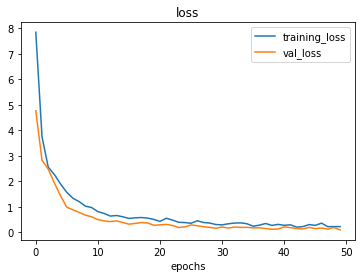

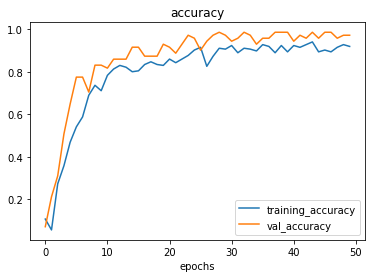

In [33]:
plot_loss_curve(history_4)

### Model_5
Same as model_2
except training set alternated with augmentated training data

In [34]:
# Create model
model_5 = tf.keras.models.clone_model(model_2)

# Compile the model
model_5.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [35]:
# Fit the model
history_5 = model_5.fit(train_data_augmented,
                        epochs=20,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
8/8 [==============================] - 50s 6s/step - loss: 3.0067 - accuracy: 0.0979 - val_loss: 3.0115 - val_accuracy: 0.1268
Epoch 2/20
8/8 [==============================] - 45s 6s/step - loss: 2.9139 - accuracy: 0.1234 - val_loss: 2.9551 - val_accuracy: 0.0845
Epoch 3/20
8/8 [==============================] - 44s 6s/step - loss: 2.8243 - accuracy: 0.1362 - val_loss: 2.8130 - val_accuracy: 0.1690
Epoch 4/20
8/8 [==============================] - 44s 6s/step - loss: 2.6806 - accuracy: 0.2340 - val_loss: 2.6588 - val_accuracy: 0.2676
Epoch 5/20
8/8 [==============================] - 44s 6s/step - loss: 2.5242 - accuracy: 0.2851 - val_loss: 2.4033 - val_accuracy: 0.3380
Epoch 6/20
8/8 [==============================] - 45s 6s/step - loss: 2.1802 - accuracy: 0.4085 - val_loss: 1.9152 - val_accuracy: 0.5493
Epoch 7/20
8/8 [==============================] - 44s 6s/step - loss: 1.8060 - accuracy: 0.4681 - val_loss: 1.4161 - val_accuracy: 0.6901
Epoch 8/20
8/8 [==================

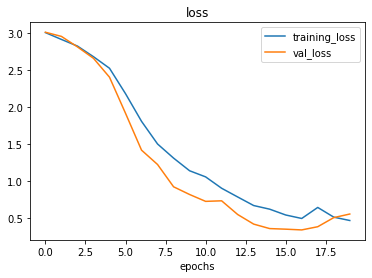

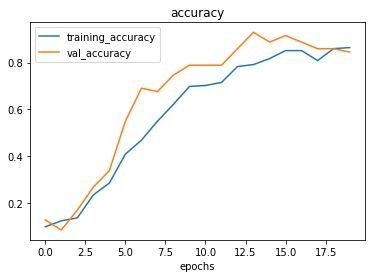

In [60]:
plot_loss_curve(history_5)

### Model_6
same as model_5 
with 50 epochs

In [36]:
# Create model
model_6 = tf.keras.models.clone_model(model_2)

# Compile the model
model_6.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [37]:
# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=50,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/50
8/8 [==============================] - 48s 6s/step - loss: 3.1106 - accuracy: 0.0894 - val_loss: 3.0207 - val_accuracy: 0.0845
Epoch 2/50
8/8 [==============================] - 45s 6s/step - loss: 2.9740 - accuracy: 0.1021 - val_loss: 3.0091 - val_accuracy: 0.0845
Epoch 3/50
8/8 [==============================] - 44s 6s/step - loss: 2.9478 - accuracy: 0.1319 - val_loss: 3.0070 - val_accuracy: 0.0986
Epoch 4/50
8/8 [==============================] - 45s 6s/step - loss: 2.9127 - accuracy: 0.1149 - val_loss: 2.9391 - val_accuracy: 0.0845
Epoch 5/50
8/8 [==============================] - 44s 6s/step - loss: 2.8697 - accuracy: 0.0936 - val_loss: 2.9165 - val_accuracy: 0.0845
Epoch 6/50
8/8 [==============================] - 44s 6s/step - loss: 2.8251 - accuracy: 0.1362 - val_loss: 2.7870 - val_accuracy: 0.2817
Epoch 7/50
8/8 [==============================] - 45s 6s/step - loss: 2.6728 - accuracy: 0.3362 - val_loss: 2.6088 - val_accuracy: 0.2958
Epoch 8/50
8/8 [==================

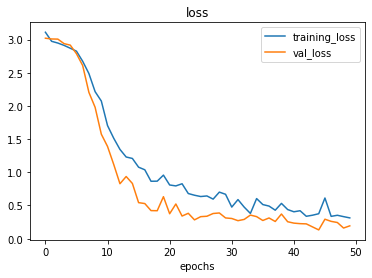

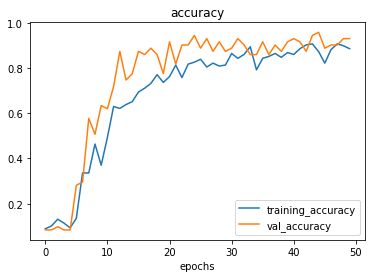

In [61]:
plot_loss_curve(history_6)

## Model evaluation

In [38]:
def summary_model(model_no):
  # Predict classes
  test_steps_per_epoch = np.math.ceil(test_data.samples / test_data.batch_size)

  predictions = model_no.predict_generator(test_data, steps=test_steps_per_epoch)

  # Get most likely class
  predicted_classes = np.argmax(predictions, axis=1)
  # print(predicted_classes)

  # Get ground-truth classes and class-labels
  true_classes = test_data.classes
  class_labels = list(test_data.class_indices.keys())
  

  # Concusion matrix
  print("confusion matrix")
  # print(confusion_matrix(true_classes, predicted_classes))
  cm = confusion_matrix(true_classes, predicted_classes)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

  # Use scikit-learn to get statistics
  report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
  print(report) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


confusion matrix


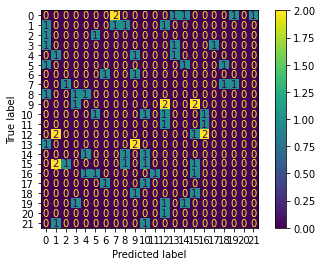

                 precision    recall  f1-score   support

     BE_control       0.00      0.00      0.00         6
       BE_meter       0.00      0.00      0.00         4
       BF_meter       0.00      0.00      0.00         2
    BP_boiler_1       0.00      0.00      0.00         3
    BP_boiler_2       0.00      0.00      0.00         3
    BP_boiler_3       0.00      0.00      0.00         3
    BP_boiler_4       0.50      0.50      0.50         2
    BP_boiler_5       0.00      0.00      0.00         3
BP_compressor_1       0.00      0.00      0.00         3
BP_compressor_2       0.00      0.00      0.00         5
BP_compressor_3       0.20      0.25      0.22         4
BP_compressor_4       0.00      0.00      0.00         2
BP_compressor_5       0.00      0.00      0.00         5
     BP_control       0.00      0.00      0.00         3
       BT_meter       0.00      0.00      0.00         3
     BW_meter_1       0.17      0.17      0.17         6
   B_hour_meter       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
summary_model(model_1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


confusion matrix


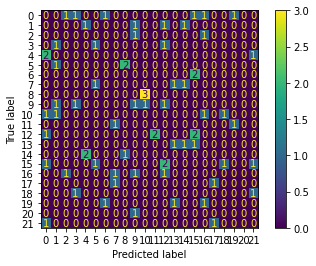

                 precision    recall  f1-score   support

     BE_control       0.00      0.00      0.00         6
       BE_meter       0.00      0.00      0.00         4
       BF_meter       0.00      0.00      0.00         2
    BP_boiler_1       0.00      0.00      0.00         3
    BP_boiler_2       0.00      0.00      0.00         3
    BP_boiler_3       0.00      0.00      0.00         3
    BP_boiler_4       0.00      0.00      0.00         2
    BP_boiler_5       0.00      0.00      0.00         3
BP_compressor_1       0.00      0.00      0.00         3
BP_compressor_2       0.20      0.20      0.20         5
BP_compressor_3       0.00      0.00      0.00         4
BP_compressor_4       0.00      0.00      0.00         2
BP_compressor_5       0.00      0.00      0.00         5
     BP_control       0.33      0.33      0.33         3
       BT_meter       0.00      0.00      0.00         3
     BW_meter_1       0.00      0.00      0.00         6
   B_hour_meter       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
summary_model(model_2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


confusion matrix


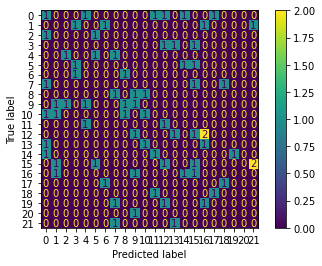

                 precision    recall  f1-score   support

     BE_control       0.17      0.17      0.17         6
       BE_meter       0.00      0.00      0.00         4
       BF_meter       0.00      0.00      0.00         2
    BP_boiler_1       0.00      0.00      0.00         3
    BP_boiler_2       0.00      0.00      0.00         3
    BP_boiler_3       0.00      0.00      0.00         3
    BP_boiler_4       0.00      0.00      0.00         2
    BP_boiler_5       0.00      0.00      0.00         3
BP_compressor_1       0.00      0.00      0.00         3
BP_compressor_2       0.20      0.20      0.20         5
BP_compressor_3       0.33      0.25      0.29         4
BP_compressor_4       0.00      0.00      0.00         2
BP_compressor_5       0.00      0.00      0.00         5
     BP_control       0.00      0.00      0.00         3
       BT_meter       0.00      0.00      0.00         3
     BW_meter_1       0.17      0.17      0.17         6
   B_hour_meter       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
summary_model(model_3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


confusion matrix


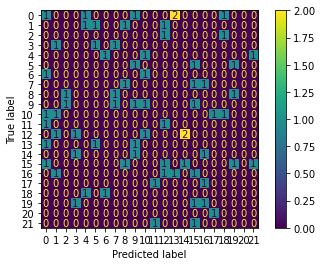

                 precision    recall  f1-score   support

     BE_control       0.17      0.17      0.17         6
       BE_meter       0.00      0.00      0.00         4
       BF_meter       0.00      0.00      0.00         2
    BP_boiler_1       0.00      0.00      0.00         3
    BP_boiler_2       0.00      0.00      0.00         3
    BP_boiler_3       0.00      0.00      0.00         3
    BP_boiler_4       0.00      0.00      0.00         2
    BP_boiler_5       0.00      0.00      0.00         3
BP_compressor_1       0.00      0.00      0.00         3
BP_compressor_2       0.20      0.20      0.20         5
BP_compressor_3       0.00      0.00      0.00         4
BP_compressor_4       0.00      0.00      0.00         2
BP_compressor_5       0.00      0.00      0.00         5
     BP_control       0.00      0.00      0.00         3
       BT_meter       0.00      0.00      0.00         3
     BW_meter_1       0.00      0.00      0.00         6
   B_hour_meter       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
summary_model(model_4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


confusion matrix


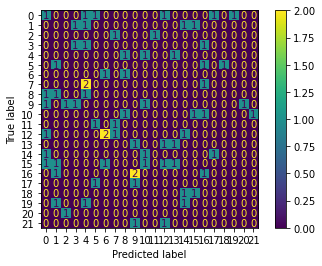

                 precision    recall  f1-score   support

     BE_control       0.17      0.17      0.17         6
       BE_meter       0.00      0.00      0.00         4
       BF_meter       0.00      0.00      0.00         2
    BP_boiler_1       0.33      0.33      0.33         3
    BP_boiler_2       0.00      0.00      0.00         3
    BP_boiler_3       0.00      0.00      0.00         3
    BP_boiler_4       0.25      0.50      0.33         2
    BP_boiler_5       0.00      0.00      0.00         3
BP_compressor_1       0.00      0.00      0.00         3
BP_compressor_2       0.00      0.00      0.00         5
BP_compressor_3       0.00      0.00      0.00         4
BP_compressor_4       0.00      0.00      0.00         2
BP_compressor_5       0.00      0.00      0.00         5
     BP_control       0.33      0.33      0.33         3
       BT_meter       0.00      0.00      0.00         3
     BW_meter_1       0.00      0.00      0.00         6
   B_hour_meter       0.20    

In [43]:
summary_model(model_5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


confusion matrix


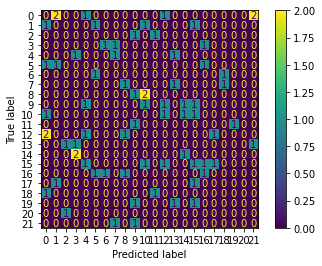

                 precision    recall  f1-score   support

     BE_control       0.00      0.00      0.00         6
       BE_meter       0.00      0.00      0.00         4
       BF_meter       0.00      0.00      0.00         2
    BP_boiler_1       0.00      0.00      0.00         3
    BP_boiler_2       0.00      0.00      0.00         3
    BP_boiler_3       0.00      0.00      0.00         3
    BP_boiler_4       0.00      0.00      0.00         2
    BP_boiler_5       0.00      0.00      0.00         3
BP_compressor_1       0.00      0.00      0.00         3
BP_compressor_2       0.00      0.00      0.00         5
BP_compressor_3       0.00      0.00      0.00         4
BP_compressor_4       0.00      0.00      0.00         2
BP_compressor_5       0.00      0.00      0.00         5
     BP_control       0.00      0.00      0.00         3
       BT_meter       0.33      0.33      0.33         3
     BW_meter_1       0.17      0.17      0.17         6
   B_hour_meter       0.25    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
summary_model(model_6)

In [62]:
model_4.save("saved_model_4")
model_5.save("saved_model_5")

INFO:tensorflow:Assets written to: saved_model_4/assets
INFO:tensorflow:Assets written to: saved_model_5/assets


In [45]:
def load_and_prep_image(filename, img_shape=224):

  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size as the model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [59]:
# Automating
# def predict_random_image(model, images, true_labels, classes):
 
#   # Setup random integer
#   i = random.randint(0, len(images)-1)
  
#   # Create predictions and targets
#   target_image = images[i]
#   target_image = tf.image.resize(target_image, size = [224, 224])
#   # target_image = target_image/255.
#   pred_probs = model.predict(tf.expand_dims(target_image, axis=0)) # have to reshape to get into right size for model
#   pred_label = classes[pred_probs.argmax()]
#   true_label = classes[true_labels[i]]

#   # Plot the target image
#   plt.imshow(target_image, cmap=plt.cm.binary)

#   # Change the color of the titles depending on if the prediction is right or wrong
#   if pred_label == true_label:
#     color = "green"
#   else:
#     color = "red"

#   # Add xlabel information (prediction/true label)
#   plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
#                                                    100*tf.reduce_max(pred_probs),
#                                                    true_label),
#              color=color) # set the color to green or red

In [53]:
def plot_random_image(model, images_path, true_labels, classes):
  '''True labels(str): Manually label image which you picked from any classes'''

  # Load image
  images = load_and_prep_image(images_path)
  
  
  pred_probs = model.predict(tf.expand_dims(images, axis=0)) 
  pred_label = classes[pred_probs.argmax()]
  true_label = true_labels

  # Plot the target image
  plt.imshow(images)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

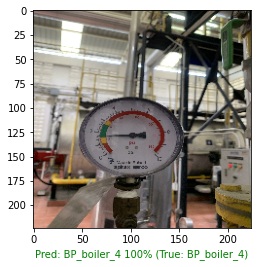

In [57]:
plot_random_image(model=model_4, 
                  images_path="/content/content/test/BP_boiler_4/IMG_4203.jpg",
                  true_labels="BP_boiler_4",
                  classes=class_names)

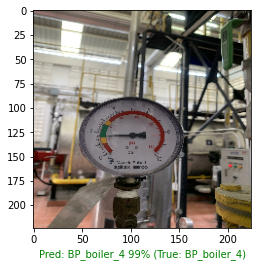

In [58]:
plot_random_image(model=model_5, 
                  images_path="/content/content/test/BP_boiler_4/IMG_4203.jpg",
                  true_labels="BP_boiler_4",
                  classes=class_names)

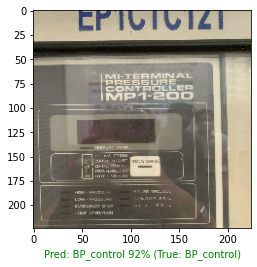

In [55]:
plot_random_image(model=model_4, 
                  images_path="/content/content/test/BP_control/IMG_4235.jpg",
                  true_labels="BP_control",
                  classes=class_names)

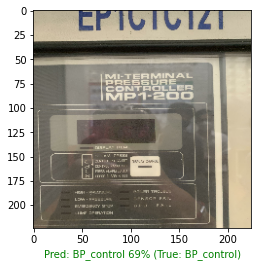

In [56]:
plot_random_image(model=model_5, 
                  images_path="/content/content/test/BP_control/IMG_4235.jpg",
                  true_labels="BP_control",
                  classes=class_names)